In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Part B/J

In [ ]:
model = InceptionV3(weights='imagenet', include_top=True)

In [ ]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


1. acoustic_guitar: 95.80%
2. electric_guitar: 2.25%
3. banjo: 0.19%


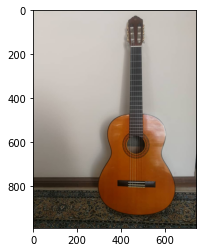

In [ ]:
inputshape  = (299,299)
myimg = image.load_img('/content/drive/My Drive/guitar.jpg',target_size = inputshape)
myimg = image.img_to_array(myimg)
myimg = np.expand_dims(myimg , axis = 0)
myimg = preprocess_input(myimg)

pred = model.predict(myimg)
ans = decode_predictions(pred , top = 3)
for (i, (imagenetID, label, prob)) in enumerate(ans[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

plt.imshow(image.load_img('/content/drive/My Drive/guitar.jpg'))

part D  - AUTOENCODER 

In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'],label='train_loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='train_accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid()


In [ ]:
from keras.datasets import cifar10
(x_train,y_train) , (x_test,y_test) =  cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(x_train.shape[0],32*32*3)
x_test = x_test.reshape(x_test.shape[0],32*32*3)

In [ ]:
from keras import layers , Model
from keras.layers import Dense
input_img = layers.Input(shape=(3072,))
encode = Dense(1200,activation = 'relu')(input_img)
#encode2 = Dense(972,activation = 'relu')(encode)
#encode3= Dense(972,activation = 'relu')(encode2)
#encode4 = Dense(1875,activation = 'relu')(encode2)
decode = Dense(3072,activation = 'sigmoid')(encode)

AEmodel = Model(input_img,decode)
ENmodel = Model(input_img,encode)
decoder_input = layers.Input(shape=(1200,))

Dlayer = AEmodel.layers[-1]
Dmodel = Model(decoder_input,Dlayer(decoder_input))
AEmodel.summary()
ENmodel.summary()
Dmodel.summary()

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1200)              3687600   
_________________________________________________________________
dense_25 (Dense)             (None, 3072)              3689472   
Total params: 7,377,072
Trainable params: 7,377,072
Non-trainable params: 0
_________________________________________________________________
Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1200)              3687600   
Total params: 3,687,

In [ ]:
AEmodel.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
trainModel = AEmodel.fit(x_train,x_train,batch_size=32,epochs =50 , validation_split=0.2)


Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6042 - accuracy: 0.0062 - val_loss: 0.5852 - val_accuracy: 0.0080
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5797 - accuracy: 0.0115 - val_loss: 0.5743 - val_accuracy: 0.0114
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5714 - accuracy: 0.0137 - val_loss: 0.5702 - val_accuracy: 0.0144
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5690 - accuracy: 0.0173 - val_loss: 0.5746 - val_accuracy: 0.0173
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5678 - accuracy: 0.0184 - val_loss: 0.5696 - val_accuracy: 0.0181
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5670 - accuracy: 0.0190 - val_loss: 0.5672 - val_accuracy: 0.0190
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5665 - accuracy: 0.0195 - val_loss: 0.5688 - val_accuracy:

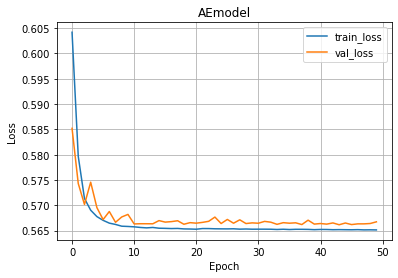

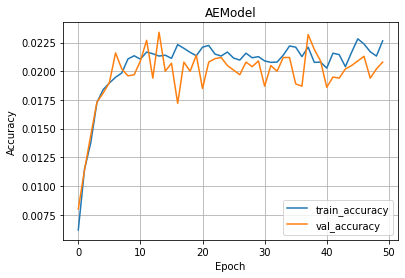

In [ ]:
plot_loss(trainModel)
plt.title(str("AEmodel"))
plt.show()
plot_accuracy(trainModel)
plt.title(str("AEModel"))
plt.show()

In [ ]:
inputshape = (32,32)
ax = image.load_img('/content/drive/MyDrive/pot.jpg', target_size=inputshape)
myimg = image.img_to_array(ax)
myimg = myimg.astype('float32')/255




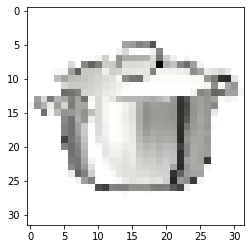

In [ ]:
plt.imshow(myimg)

In [ ]:
myimg = myimg.reshape(1,32*32*3)

In [ ]:
pred = AEmodel.evaluate(myimg,myimg)
if pred[0]>0.4 and pred[0]<0.6:
  print("accepted")
else :
  print("rejected ")

1/1 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.0000e+00
rejected 


In [ ]:
encoded_image = ENmodel.predict(myimg)
decoded_image = Dmodel.predict(encoded_image)
#an = AEmodel.predict(myimg)